In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

# DATASET II

In [2]:
data_3l = pd.read_csv('column_3C_weka.csv')
print(data_3l.shape)
data_3l.head()

(310, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [3]:
data_3l.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [4]:
data_3l.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [5]:
data_3l['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

# PLOTTING

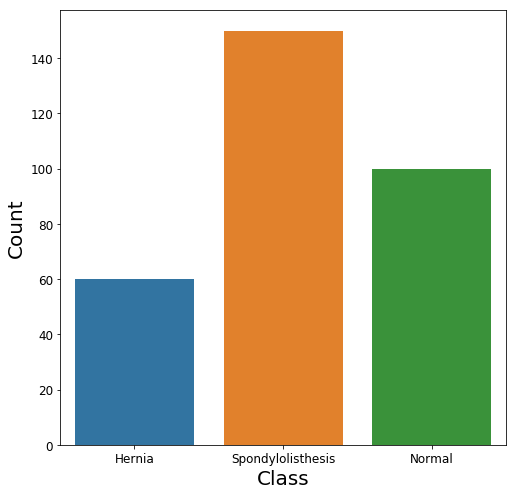

In [6]:
plt.figure(figsize = (8,8))
sns.countplot(data_3l['class'])
plt.xlabel('Class', fontdict={'fontsize':20})
plt.ylabel('Count',fontdict={'fontsize':20})
plt.tick_params(labelsize = 12)

In [7]:
means = data_3l.groupby('class').agg(np.mean)
means

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [8]:
means.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

Text(0.5, 1.0, 'UNDERSTANDING THE CAUSES')

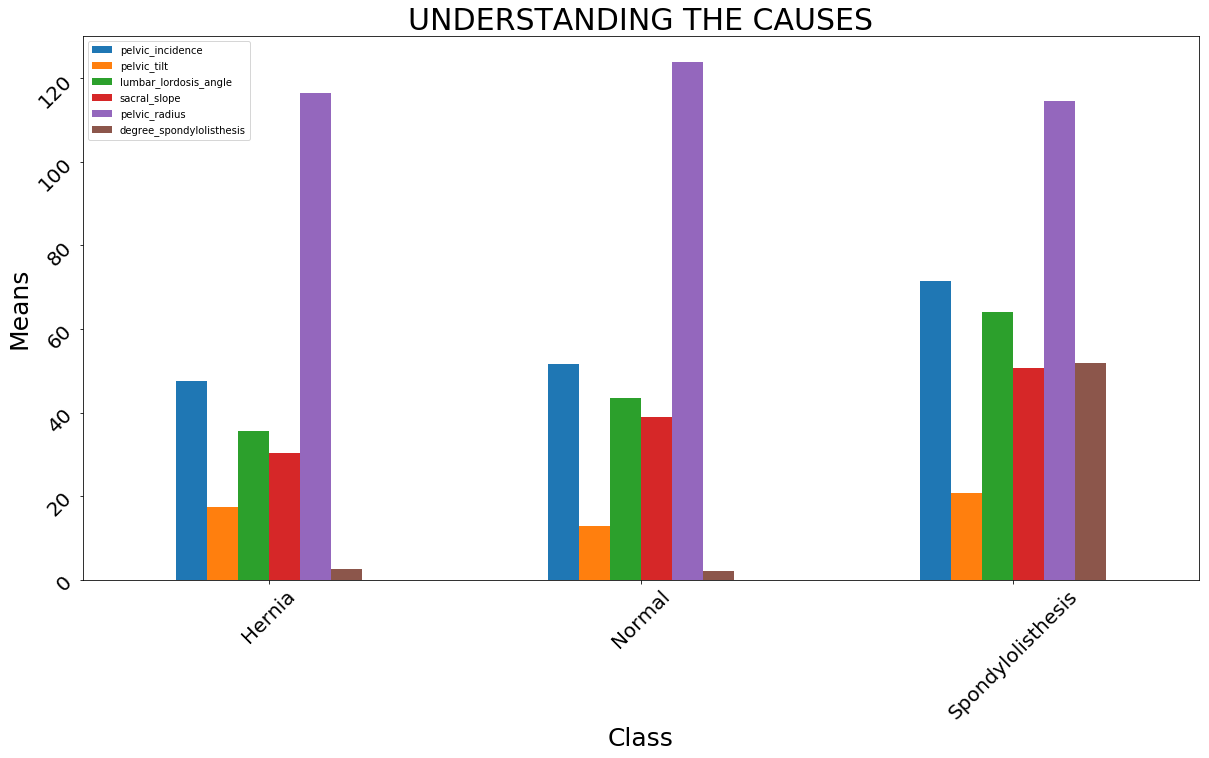

In [9]:
means.plot(kind = 'bar', figsize = (20,10), fontsize = 20)
plt.xlabel('Class',fontdict={'fontsize': 25})
plt.ylabel('Means',fontdict={'fontsize': 25})
plt.tick_params(labelrotation = 45)
plt.title('UNDERSTANDING THE CAUSES', fontdict={"fontsize":30})

# PREPROCESSING

In [10]:
X = data_3l.iloc[:,:6].values
y = data_3l['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# MODEL IMPLEMENTATION

In [11]:
lr = LogisticRegression(C = 6, solver='liblinear', multi_class='auto', max_iter= 400)
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print('Accuracy = {0}'.format(lr.score(X_test,y_test)))
print(classification_report(y_test, predictions))

Accuracy = 0.8709677419354839
                   precision    recall  f1-score   support

           Hernia       0.75      0.50      0.60         6
           Normal       0.80      0.92      0.86        13
Spondylolisthesis       1.00      1.00      1.00        12

        micro avg       0.87      0.87      0.87        31
        macro avg       0.85      0.81      0.82        31
     weighted avg       0.87      0.87      0.86        31

